## Download the file

In [1]:
import numpy as np
import pandas as pd
articlesScience = np.load("science2k-doc-word.npy")
wordDoc = np.load("science2k-word-doc.npy")
vocabulary = pd.read_csv('science2k-vocab.txt', sep=" ", header=None)
titles = pd.read_csv('science2k-titles.txt', sep=" ", header=None)


## a. Cluster documents with different values of k without PCA

k =  1 :  Counter({0: 1373})
k =  2 :  Counter({1: 976, 0: 397})
k =  3 :  Counter({2: 565, 1: 426, 0: 382})
k =  4 :  Counter({2: 562, 0: 436, 3: 335, 1: 40})
k =  5 :  Counter({4: 498, 0: 349, 2: 316, 3: 142, 1: 68})
k =  6 :  Counter({2: 470, 5: 259, 0: 219, 1: 205, 4: 148, 3: 72})
k =  7 :  Counter({2: 551, 3: 329, 5: 309, 4: 144, 0: 31, 6: 6, 1: 3})
k =  8 :  Counter({6: 383, 4: 317, 5: 203, 2: 150, 7: 143, 3: 143, 0: 31, 1: 3})
k =  9 :  Counter({1: 479, 5: 367, 3: 193, 6: 160, 4: 95, 2: 36, 0: 33, 7: 9, 8: 1})
k =  10 :  Counter({3: 472, 4: 265, 8: 230, 6: 115, 5: 93, 0: 89, 1: 75, 2: 25, 7: 8, 9: 1})
k =  11 :  Counter({4: 450, 3: 214, 8: 172, 10: 157, 1: 133, 9: 122, 6: 69, 2: 34, 5: 16, 7: 5, 0: 1})
k =  12 :  Counter({3: 429, 10: 250, 6: 200, 2: 168, 11: 128, 1: 62, 5: 50, 0: 37, 9: 26, 8: 11, 4: 11, 7: 1})
k =  13 :  Counter({12: 275, 1: 210, 7: 210, 9: 202, 8: 133, 11: 121, 5: 99, 0: 85, 6: 30, 10: 5, 2: 1, 3: 1, 4: 1})
k =  14 :  Counter({4: 304, 6: 248, 8: 151, 13: 137, 

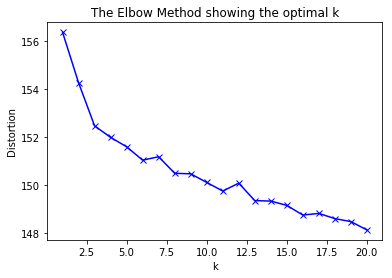

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from collections import Counter
import matplotlib.pyplot as plt

X = articlesScience
distortions = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,max_iter=10, n_init=10, init="k-means++").fit(X)
    centroids = kmeans.cluster_centers_
    print("k = ", i,": ", Counter(kmeans.labels_))
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])
 
#Plot the elbow
plt.plot(range(1,21), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## a. Cluster documents with different values of k with PCA

k =  1 :  Counter({0: 1373})
k =  2 :  Counter({1: 968, 0: 405})
k =  3 :  Counter({0: 576, 2: 415, 1: 382})
k =  4 :  Counter({2: 580, 0: 364, 1: 254, 3: 175})
k =  5 :  Counter({4: 493, 1: 353, 3: 236, 0: 174, 2: 117})
k =  6 :  Counter({2: 497, 1: 303, 4: 228, 0: 165, 3: 105, 5: 75})
k =  7 :  Counter({3: 326, 1: 280, 2: 255, 5: 190, 4: 152, 0: 96, 6: 74})
k =  8 :  Counter({0: 345, 5: 236, 3: 192, 2: 169, 1: 141, 6: 129, 4: 97, 7: 64})
k =  9 :  Counter({8: 327, 2: 180, 7: 167, 4: 166, 5: 131, 0: 123, 1: 119, 6: 93, 3: 67})
k =  10 :  Counter({2: 337, 3: 178, 5: 149, 7: 135, 9: 133, 1: 122, 6: 97, 0: 90, 4: 70, 8: 62})
k =  11 :  Counter({2: 324, 6: 158, 10: 152, 8: 129, 0: 126, 4: 125, 1: 101, 7: 91, 9: 65, 3: 52, 5: 50})
k =  12 :  Counter({1: 305, 6: 148, 11: 125, 8: 123, 7: 115, 3: 110, 9: 99, 2: 96, 10: 89, 0: 75, 4: 52, 5: 36})
k =  13 :  Counter({0: 245, 1: 144, 11: 140, 5: 128, 12: 115, 3: 115, 8: 111, 10: 91, 6: 85, 2: 68, 4: 62, 9: 44, 7: 25})
k =  14 :  Counter({6: 210, 

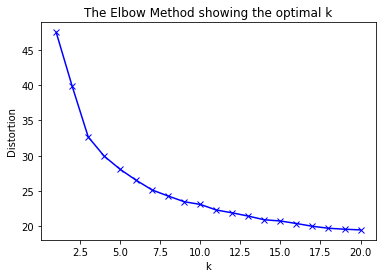

In [15]:
from sklearn.decomposition import PCA
X = articlesScience
pca = PCA(n_components=5)
pca.fit(X)
F = pca.transform(X)
X = F
distortions = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,max_iter=10, n_init=10, init="k-means++").fit(X)
    centroids = kmeans.cluster_centers_
    print("k = ", i,": ", Counter(kmeans.labels_))
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])
 
#Plot the elbow
plt.plot(range(1,21), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## a. Get the top 10 documents from k clusters 

In [19]:
X = articlesScience
kmeans = KMeans(n_clusters=3,max_iter=100,n_init=10, init="k-means++").fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
for j in range(0,3):
    indexofK = np.where(labels == j)
    X_new = kmeans.transform(X[indexofK])[:,j]
    ind = np.argsort(X_new)[:10]
    print("Cluster ",j,":")
    print(titles.iloc[ind])

Cluster  0 :
                                                     0
379                      Unraveling a Membrane Protein
39   Toward the End of <latex>$PuO{_2}'s$</latex> S...
381  Biologists and Engineers Create a New Generati...
212                   Stem Cells in Epithelial Tissues
168  Requirement for DARPP-32 in Progesterone-Facil...
228  Regulation of Cell Fate Decision of Undifferen...
361    On the Presence of Liquid in Earth's Inner Core
206                         The Business of Stem Cells
45   Rutile-Bearing Refractory Eclogites: Missing L...
406                                  Who's Got Rhythm?
Cluster  1 :
                                                     0
226  Parental Care and Clutch Sizes in North and So...
245  A Global View of Martian Surface Compositions ...
198  Getting a More Precise Grip on the Physical World
217  An Oral Vaccine against NMDAR1 with Efficacy i...
0                         Archaeology in the Holy Land
43   Cenozoic Deep-Sea Temperatures and

## b. Cluster with different values of k for words without PCA

k =  1 :  Counter({0: 5476})
k =  2 :  Counter({1: 4883, 0: 593})
k =  3 :  Counter({2: 4356, 1: 691, 0: 429})
k =  4 :  Counter({3: 3883, 1: 617, 2: 557, 0: 419})
k =  5 :  Counter({0: 3548, 1: 763, 2: 557, 4: 321, 3: 287})
k =  6 :  Counter({5: 3426, 0: 637, 4: 629, 1: 409, 2: 374, 3: 1})
k =  7 :  Counter({6: 3445, 0: 537, 1: 509, 5: 482, 3: 295, 4: 207, 2: 1})
k =  8 :  Counter({0: 2897, 7: 1108, 6: 575, 1: 501, 5: 222, 4: 143, 3: 18, 2: 12})
k =  9 :  Counter({0: 2780, 3: 724, 5: 703, 7: 663, 2: 286, 1: 163, 6: 144, 8: 12, 4: 1})
k =  10 :  Counter({1: 3360, 5: 578, 4: 554, 0: 434, 2: 257, 7: 196, 6: 82, 8: 12, 9: 2, 3: 1})
k =  11 :  Counter({7: 2329, 9: 810, 10: 706, 3: 544, 2: 330, 1: 245, 5: 234, 4: 165, 6: 111, 0: 1, 8: 1})
k =  12 :  Counter({10: 2551, 6: 855, 3: 675, 7: 414, 1: 407, 2: 364, 9: 134, 11: 72, 8: 1, 5: 1, 4: 1, 0: 1})
k =  13 :  Counter({11: 3105, 1: 882, 2: 634, 9: 483, 7: 218, 0: 110, 8: 37, 3: 2, 6: 1, 10: 1, 4: 1, 5: 1, 12: 1})
k =  14 :  Counter({13: 3383,

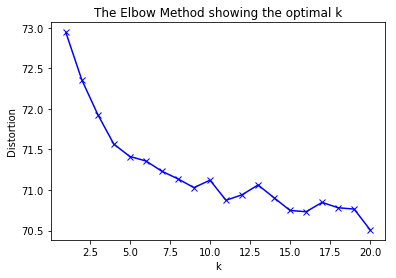

In [20]:
X = wordDoc
distortions = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,max_iter=10, n_init=10, init="k-means++").fit(X)
    centroids = kmeans.cluster_centers_
    print("k = ", i,": ", Counter(kmeans.labels_))
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])
 
#Plot the elbow
plt.plot(range(1,21), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## b. Cluster with different values of k for words with PCA

k =  1 :  Counter({0: 5476})
k =  2 :  Counter({1: 4798, 0: 678})
k =  3 :  Counter({1: 4294, 2: 617, 0: 565})
k =  4 :  Counter({0: 3773, 1: 651, 2: 583, 3: 469})
k =  5 :  Counter({3: 3106, 0: 1022, 2: 569, 1: 563, 4: 216})
k =  6 :  Counter({1: 2890, 0: 987, 5: 693, 4: 534, 3: 202, 2: 170})
k =  7 :  Counter({2: 2880, 5: 908, 1: 544, 6: 507, 4: 315, 0: 163, 3: 159})
k =  8 :  Counter({1: 2825, 0: 701, 3: 537, 2: 464, 6: 390, 4: 278, 7: 151, 5: 130})
k =  9 :  Counter({4: 2429, 5: 779, 0: 739, 1: 489, 7: 341, 8: 248, 3: 181, 6: 142, 2: 128})
k =  10 :  Counter({0: 2224, 3: 712, 1: 672, 2: 465, 6: 395, 8: 391, 7: 180, 5: 172, 9: 153, 4: 112})
k =  11 :  Counter({0: 2250, 5: 706, 10: 610, 1: 428, 8: 405, 4: 381, 2: 198, 6: 156, 7: 135, 3: 110, 9: 97})
k =  12 :  Counter({1: 1930, 0: 922, 6: 671, 11: 639, 9: 256, 8: 231, 2: 229, 3: 213, 4: 122, 5: 106, 10: 80, 7: 77})
k =  13 :  Counter({2: 2029, 3: 659, 5: 633, 1: 524, 4: 446, 7: 346, 6: 185, 10: 151, 8: 126, 0: 110, 9: 109, 12: 81, 11

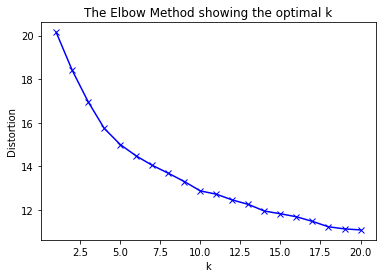

In [21]:
pca = PCA(n_components=5)
X = wordDoc
pca.fit(X)
F = pca.transform(X)
X = F
distortions = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,max_iter=10, n_init=10, init="k-means++").fit(X)
    centroids = kmeans.cluster_centers_
    print("k = ", i,": ", Counter(kmeans.labels_))
    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])
 
#Plot the elbow
plt.plot(range(1,21), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## b. Get the top 10 words from each of the k clusters

In [22]:
X = wordDoc
kmeans = KMeans(n_clusters=3,max_iter=100,n_init=10, init="k-means++").fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for j in range(0,3):
    indexofK = np.where(labels == j)
    X_new = kmeans.transform(X[indexofK])[:,j]
    ind = np.argsort(X_new)[:10]
    print("Cluster ",j,":")
    print(vocabulary.iloc[ind])

Cluster  0 :
                0
4179      promise
4136         aged
4268     peptidyl
3852  supernatant
4311   phenotypic
3832     episodes
4169       season
4118       easier
3392    promising
2271  progression
Cluster  1 :
             0
4          end
597   medicine
513   assembly
606   location
594      third
590      laser
558    spatial
560  substrate
601   boundary
522     simple
Cluster  2 :
              0
528      humans
503  particular
511     signals
533   reduction
530      amount
523        iron
532      tested
534       blood
529       acids
513    assembly


In [23]:
X = wordDoc
kmeans = KMeans(n_clusters=4,max_iter=100,n_init=10, init="k-means++").fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for j in range(0,4):
    indexofK = np.where(labels == j)
    X_new = kmeans.transform(X[indexofK])[:,j]
    ind = np.argsort(X_new)[:10]
    print(vocabulary.iloc[ind])

               0
418     isolated
421  replication
406     critical
420          far
383        metal
407         view
404        short
419    developed
373     approach
411     analyzed
             0
3593  teaching
3327   radical
3576     scans
3634       mix
3307    attack
3758     signs
2897    threat
1868     going
3762   fitting
3624  rotating
              0
3           two
588       white
575     remains
555  antibodies
544   effective
546       error
583       force
505  mechanisms
510     primary
587     product
               0
661          co2
615        depth
671          tip
618     provides
643    selection
613      members
658  observation
602        rapid
644      history
607        actin
